In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from scipy.stats import norm
import pandas as pd

# Neural Networks: List3 - Problem 2

Using the fact that $cov(X,Y)=\rho \sigma^2_X\sigma_Y^2$ and $\rho\in[0,1]$.

In [2]:
cov_matrix = np.random.random(size=(2,2))
cov_matrix[0, 0] *= 2
cov_matrix[1, 1] *= 2
cov_matrix[0, 1] = cov_matrix[0, 0] * cov_matrix[1, 1] * cov_matrix[0, 1]
cov_matrix[1, 0] = cov_matrix[0, 1]
cov_matrix

array([[ 1.26374363,  0.11321829],
       [ 0.11321829,  0.47001401]])

In [3]:
expecatation_value1 = np.array([1, 1])
expecatation_value2 = np.array([3, 3])

In [4]:
samples_number = 100
set1 = np.random.multivariate_normal(size=samples_number, mean=expecatation_value1, cov=cov_matrix)
set2 = np.random.multivariate_normal(size=samples_number, mean=expecatation_value2, cov=cov_matrix)

In [5]:
# def discriminant(xp, A, B):
#   A_mean = A.mean()
#   B_mean = B.mean()
#   A_cov = A.corr()
#   B_cov = B.corr()
#   cov_inv = np.linalg.inv(A_cov)
#   mu_diff_times_cov_inv = (B_mean - A_mean) @ cov_inv
#   y = mu_diff_times_cov_inv[1]**-1 * (-mu_diff_times_cov_inv[0]*xp + 0.5 * (B_mean @ B_cov @ B_mean - A_mean @ A_cov @ A_mean))
#   return y

In [6]:
def plot_dists_with_elipses(A, B, n=1):
  def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]
  df_A = pd.DataFrame(A, columns=['x1', 'x2'])
  df_B = pd.DataFrame(B, columns=['x1', 'x2'])
  
  eig_values_A, eig_vectors_A = eigsorted(df_A.cov())
  eig_values_B, eig_vectors_B = eigsorted(df_B.cov())
  
  width_A, height_A = 2 * n * np.sqrt(eig_values_A)
  width_B, height_B = 2 * n * np.sqrt(eig_values_B)
  
  theta_A = np.degrees(np.arctan2(*eig_vectors_A[:,0][::-1]))
  theta_B = np.degrees(np.arctan2(*eig_vectors_B[:,0][::-1]))
  
  e1 = patches.Ellipse(df_A.mean(), width_A, height_A, linewidth=2, fill=False, angle=theta_A, color='orange')
  e2 = patches.Ellipse(df_B.mean(), width_B, height_B, linewidth=2, fill=False, angle=theta_B, color='blue')
  
  plt.scatter(x=set1[:,0], y=set1[:,1], marker='+', color='xkcd:goldenrod', label='Set 1')
  plt.scatter(x=set2[:,0], y=set2[:,1], marker='x', color='xkcd:sky blue', label='Set 2')
  
  mean_A = df_A.mean()
  mean_B = df_B.mean()
  inv_sigma_A = np.linalg.inv(df_A.cov())
  inv_sigma_B = np.linalg.inv(df_B.cov())
  wT = (mean_B  @ inv_sigma_B - mean_A @ inv_sigma_A)
  w0 = 0.5*(mean_B.T @ inv_sigma_B @ mean_B - mean_A.T @ inv_sigma_A @ mean_A)
  
  X_plot = np.arange(-2,6,0.01)
  Y_plot = X_plot * (-wT[0]/wT[1]) + w0/wT[1]
  plt.plot(X_plot, Y_plot)
  
  plt.xlim(-2,4)
  plt.ylim(-2, 6)
  plt.xlabel(r'$x_1$')
  plt.ylabel(r'$x_2$')
  plt.title(r'Normal distributions with $1-\sigma$ confidence elipses')
  plt.legend()
  
  ax = plt.gca()
  ax.add_artist(e1)
  ax.add_artist(e2)
  
  plt.show()

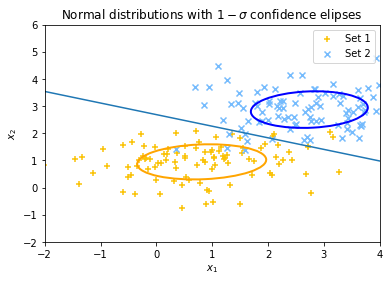

In [7]:
plot_dists_with_elipses(set1, set2, n=1)